In [163]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Optional: KNN
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [164]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders.wrapper import PolynomialWrapper


In [165]:
df = pd.read_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_SenzaOutlier.csv') 
df.shape

(87950, 24)

In [166]:
df.columns

Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'popularity_artist',
       'followers_artist', 'explicit', 'key', 'mode', 'time_signature',
       'genre', 'emotion'],
      dtype='object')

In [167]:
df['genre'].value_counts()

genre
mandopop             996
j-idol               995
heavy-metal          992
spanish              992
salsa                986
                    ... 
alt-rock             238
reggae               231
indie                192
singer-songwriter    155
latino               143
Name: count, Length: 114, dtype: int64

### encoding della var genere con count encoder

In [168]:
from category_encoders.count import CountEncoder

enc = CountEncoder(cols=['genre'], normalize=True).fit(df, df['emotion'])
df = enc.transform(df)

df

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,emotion
0,0.797420,0.947858,-0.186041,-0.472092,-0.588997,1.938632,0.659428,1.766613,-0.889812,-0.888017,...,0.079080,1.152045,0.157456,-0.277164,0,0,1,3,0.007447,nervous
1,2.550119,0.623286,1.063136,-1.167680,-1.142236,-1.067093,-0.469639,1.816690,-0.530867,-1.246693,...,0.430642,2.193447,-0.067569,-0.275450,0,5,0,4,0.007447,bored
2,0.543118,0.345082,1.355375,0.007353,-0.764607,1.004903,-0.879669,1.718254,-1.272670,-0.578946,...,1.369974,0.435994,-0.236338,-0.292966,0,7,0,3,0.007447,nervous
3,1.592682,-1.463244,0.633373,-0.369915,-1.010613,0.366106,-0.822027,1.836646,-0.443037,-1.657261,...,-0.041770,1.533392,-0.573877,-0.286607,0,6,0,4,0.007447,nervous
4,0.385608,-1.463244,1.126168,0.133109,-1.234849,-0.443351,0.558406,1.867806,-0.401379,-1.345901,...,-0.283469,0.335164,-0.180082,-0.273545,0,11,0,4,0.007447,nervous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87945,-0.061779,-0.396795,-0.564232,1.355300,1.637100,0.608776,-0.940847,1.534564,1.111459,-0.388162,...,-1.805076,0.718447,1.320089,1.250663,1,5,0,4,0.003343,excited
87946,-0.110350,1.133327,0.581802,0.325672,0.936856,-1.645092,0.136492,-0.616040,-1.018318,-0.609472,...,0.134011,-0.458242,-0.067569,-0.300284,1,9,1,4,0.003343,nervous
87947,-0.235874,2.246143,1.424137,-0.039806,0.749566,-0.122951,-0.736753,-0.605343,-0.200804,1.256403,...,-0.992088,-0.027072,1.929533,1.725765,1,11,0,4,0.003343,pleased
87948,-0.073532,1.318797,0.507310,0.557535,1.449257,-0.592442,0.139463,-0.616016,-2.392504,-0.323295,...,0.513040,-0.340721,-0.320723,-0.301306,0,0,1,4,0.003343,excited


In [169]:
df['genre'].value_counts()

genre
0.010483    2766
0.011279    1984
0.011120    1956
0.011052    1944
0.010733    1888
            ... 
0.002706     238
0.002626     231
0.002183     192
0.001762     155
0.001626     143
Name: count, Length: 99, dtype: int64

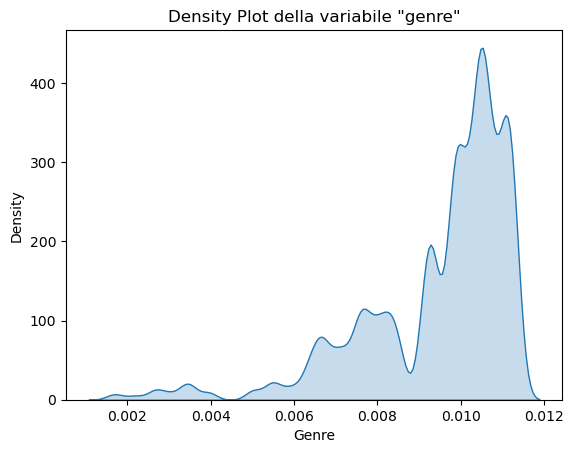

In [171]:
import seaborn as sns

# Supponiamo che 'df' sia il tuo DataFrame con la colonna 'genre'
# 'genre' è una variabile categorica
# 'df' dovrebbe essere un DataFrame di pandas che contiene questa colonna

# Creazione del grafico di densità
sns.kdeplot(data=df, x='genre', fill=True)

# Aggiunta di titolo e label agli assi
plt.title('Density Plot della variabile "genre"')
plt.xlabel('Genre')
plt.ylabel('Density')

# Mostrare il grafico
plt.show()


creo df postencoding

In [172]:
df.to_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_post_encoding.csv', index=False)

# da qui uso DF - sono solo prove, non inserite nel report

In [173]:
df = pd.read_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_post_encoding.csv') 
df.head()

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,emotion
0,0.797420,0.947858,-0.186041,-0.472092,-0.588997,1.938632,0.659428,1.766613,-0.889812,-0.888017,...,0.079080,1.152045,0.157456,-0.277164,0,0,1,3,0.007447,nervous
1,2.550119,0.623286,1.063136,-1.167680,-1.142236,-1.067093,-0.469639,1.816690,-0.530867,-1.246693,...,0.430642,2.193447,-0.067569,-0.275450,0,5,0,4,0.007447,bored
2,0.543118,0.345082,1.355375,0.007353,-0.764607,1.004903,-0.879669,1.718254,-1.272670,-0.578946,...,1.369974,0.435994,-0.236338,-0.292966,0,7,0,3,0.007447,nervous
3,1.592682,-1.463244,0.633373,-0.369915,-1.010613,0.366106,-0.822027,1.836646,-0.443037,-1.657261,...,-0.041770,1.533392,-0.573877,-0.286607,0,6,0,4,0.007447,nervous
4,0.385608,-1.463244,1.126168,0.133109,-1.234849,-0.443351,0.558406,1.867806,-0.401379,-1.345901,...,-0.283469,0.335164,-0.180082,-0.273545,0,11,0,4,0.007447,nervous


In [174]:
df.columns

Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'popularity_artist',
       'followers_artist', 'explicit', 'key', 'mode', 'time_signature',
       'genre', 'emotion'],
      dtype='object')

In [175]:
to_drop = [ 'valence', 'energy' , 'popularity']  

df = df.drop(to_drop, axis = 1)
df.head()

,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,time_signature_confidence,...,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,emotion
0,0.797420,-0.186041,-0.588997,1.938632,0.659428,1.766613,-0.889812,2.141972,-1.417948,0.787971,...,0.079080,1.152045,0.157456,-0.277164,0,0,1,3,0.007447,nervous
1,2.550119,1.063136,-1.142236,-1.067093,-0.469639,1.816690,-0.530867,-0.080843,0.765656,-1.999208,...,0.430642,2.193447,-0.067569,-0.275450,0,5,0,4,0.007447,bored
2,0.543118,1.355375,-0.764607,1.004903,-0.879669,1.718254,-1.272670,-0.147003,1.326491,-1.946310,...,1.369974,0.435994,-0.236338,-0.292966,0,7,0,3,0.007447,nervous
3,1.592682,0.633373,-1.010613,0.366106,-0.822027,1.836646,-0.443037,0.221461,1.442640,-1.916735,...,-0.041770,1.533392,-0.573877,-0.286607,0,6,0,4,0.007447,nervous
4,0.385608,1.126168,-1.234849,-0.443351,0.558406,1.867806,-0.401379,-0.081281,1.442640,0.787971,...,-0.283469,0.335164,-0.180082,-0.273545,0,11,0,4,0.007447,nervous


In [176]:
df['genre'].value_counts()

genre
0.010483    2766
0.011279    1984
0.011120    1956
0.011052    1944
0.010733    1888
            ... 
0.002706     238
0.002626     231
0.002183     192
0.001762     155
0.001626     143
Name: count, Length: 99, dtype: int64

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_8328\3607702743.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='encoded_genre', shade=True)


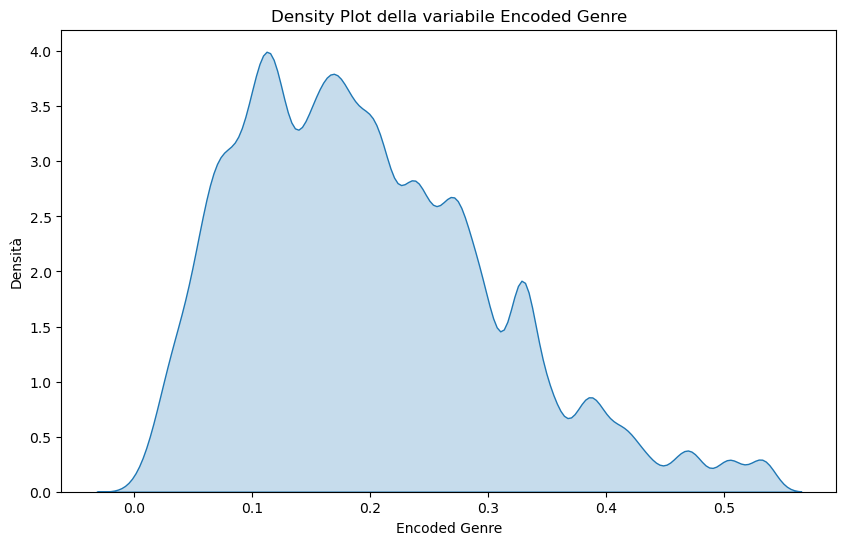

In [112]:
# Plot del density plot della variabile 'encoded_genre'
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='encoded_genre', shade=True)
plt.title('Density Plot della variabile Encoded Genre')
plt.xlabel('Encoded Genre')
plt.ylabel('Densità')
plt.show()



In [155]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['emotion'] = label_encoder.fit_transform(df['emotion'])


# Imbalanced Learning

TIPI DI BILANCIAMENTO:
- undersampling: Cluster Centroids - Edited Nearest Neighbors - Tomek Links - CondensedNearestNeighbour - RandomUnderSampler
- oversampling: RandomOverSampler - ADASYN - SMOTE
- balancing at the algo level: adjust the class weight- e meta cost sensitive classifier (NO)


eseguo class con grid search dtt e knn all'inizio e poi passo tutti gli algo

In [156]:
attributes = [col for col in df.columns if col != "emotion"]

X = df[attributes].values
y = np.array(df["emotion"])  # oppure y = df['emotion].values

X.shape, y.shape

((87950, 20), (87950,))

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Usando l'opzione stratify=y, garantisci che la suddivisione mantenga la stessa proporzione di classi tra set di addestramento e di test, utile quando hai un set di dati sbilanciato

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70360, 20), (17590, 20), (70360,), (17590,))

### classification

- adesso provo a lanciare classificatore
- poi applico under e over tutti i metodi con dt e knn

- poi posso riprovare tutto ma con un metodo di dim reduction cosi da vedere miglioramenti. ma quale?
- combo di under e over insieme?

In [158]:
#PROVO DUMMY E DT
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc

In [159]:
clf = DummyClassifier()
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0, digits=3))

Accuracy 0.20938032973280274
F1-score [0.         0.         0.34626052 0.         0.         0.
 0.         0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000      1970
           1      0.000     0.000     0.000      1429
           2      0.209     1.000     0.346      3683
           3      0.000     0.000     0.000      2662
           4      0.000     0.000     0.000      2350
           5      0.000     0.000     0.000      1415
           6      0.000     0.000     0.000        90
           7      0.000     0.000     0.000      1768
           8      0.000     0.000     0.000       627
           9      0.000     0.000     0.000      1185
          10      0.000     0.000     0.000       411

    accuracy                          0.209     17590
   macro avg      0.019     0.091     0.031     17590
weighted avg      0.044     0.209     0.073     17590



c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
#DT  addestrato a caso
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split= 2,  random_state=42)  
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Accuracy 0.43098351335986357
F1-score 0.42016499840573646
              precision    recall  f1-score   support

           0       0.54      0.51      0.53      1970
           1       0.44      0.41      0.42      1429
           2       0.38      0.57      0.46      3683
           3       0.41      0.45      0.43      2662
           4       0.42      0.38      0.40      2350
           5       0.35      0.26      0.30      1415
           6       0.42      0.26      0.32        90
           7       0.35      0.17      0.23      1768
           8       0.34      0.22      0.27       627
           9       0.66      0.73      0.69      1185
          10       0.38      0.21      0.27       411

    accuracy                           0.43     17590
   macro avg       0.43      0.38      0.39     17590
weighted avg       0.43      0.43      0.42     17590



In [177]:

train_accuracy = accuracy_score(y_train, dt.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.4836981239340534
Accuratezza sul set di test: 0.43098351335986357
Accuratezza sul set di addestramento: 0.4836981239340534
Accuratezza sul set di test: 0.42268334280841385


In [162]:
#KNN

knn = KNeighborsClassifier(n_neighbors=15)  # Puoi scegliere il numero di vicini
knn.fit(X_train, y_train)

# Fai predizioni sul set di test
y_pred = knn.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, digits =3)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_result)

Accuracy: 0.42268334280841385
Classification Report:
               precision    recall  f1-score   support

           0      0.469     0.516     0.492      1970
           1      0.385     0.347     0.365      1429
           2      0.394     0.557     0.461      3683
           3      0.392     0.433     0.411      2662
           4      0.412     0.393     0.402      2350
           5      0.347     0.233     0.278      1415
           6      0.609     0.156     0.248        90
           7      0.405     0.233     0.296      1768
           8      0.420     0.137     0.207       627
           9      0.649     0.758     0.699      1185
          10      0.347     0.141     0.201       411

    accuracy                          0.423     17590
   macro avg      0.439     0.355     0.369     17590
weighted avg      0.419     0.423     0.410     17590



CON GRID

In [ ]:
#con grid
from sklearn.model_selection import GridSearchCV

# Decision Tree
dt_param_grid = {
    'max_depth': [10], #None, 3, 5,
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

print("Migliori parametri per Decision Tree:", dt_grid_search.best_params_)
print("Migliore accuratezza sul set di addestramento:", dt_grid_search.best_score_)


Migliori parametri per Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Migliore accuratezza sul set di addestramento: 0.6141984081864696


In [ ]:
dt_best_model = dt_grid_search.best_estimator_
y_pred = dt_best_model.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Accuracy 0.6226833428084139
F1-score 0.6229895756167299
              precision    recall  f1-score   support

       angry       0.82      0.71      0.76      1970
       bored       0.57      0.57      0.57      1429
        calm       0.69      0.72      0.71      3683
     excited       0.64      0.60      0.62      2662
       happy       0.57      0.59      0.58      2350
     nervous       0.45      0.46      0.45      1415
    peaceful       0.48      0.23      0.31        90
     pleased       0.44      0.48      0.46      1768
     relaxed       0.57      0.51      0.54       627
         sad       0.80      0.88      0.84      1185
      sleepy       0.55      0.54      0.55       411

    accuracy                           0.62     17590
   macro avg       0.60      0.57      0.58     17590
weighted avg       0.63      0.62      0.62     17590



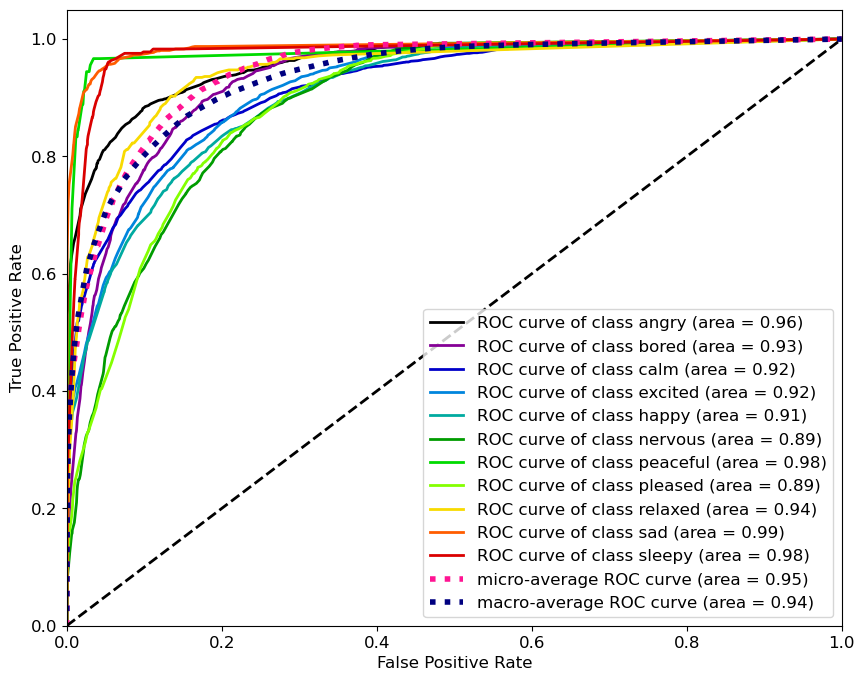

In [ ]:
from scikitplot.metrics import plot_roc

y_score = dt_best_model.predict_proba(X_test)
plot_roc(y_test, y_score, figsize=(10,8), title_fontsize=15, text_fontsize=12)
plt.title("")
plt.show()

verifico eventuale overifitting:
1. Confronto tra prestazioni di addestramento e test: Calcola l'accuratezza del modello sia sul set di addestramento che sul set di test e confrontali. Se l'accuratezza sul set di addestramento è molto più alta rispetto a quella sul set di test, potrebbe essere un segno di overfitting.

2. Curve di Apprendimento: Disegna le curve di apprendimento per valutare le prestazioni del modello al variare della dimensione del set di addestramento e confronta le prestazioni sul set di addestramento e di test.

3. Curva di Complessità del Modello: Disegna la curva di complessità del modello per valutare le prestazioni del modello al variare della complessità, ad esempio la profondità massima dell'albero decisionale, e confronta le prestazioni sul set di addestramento e di test.

In [ ]:
#1 
train_accuracy = dt_best_model.score(X_train, y_train)
test_accuracy = dt_best_model.score(X_test, y_test)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)




Accuratezza sul set di addestramento: 0.6407902217168846
Accuratezza sul set di test: 0.6226833428084139


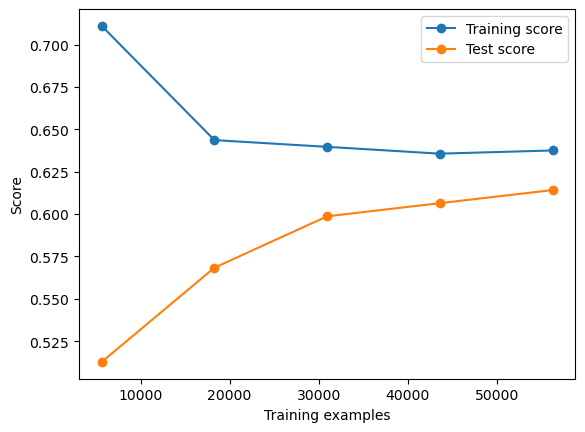

In [ ]:
#2

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(dt_best_model, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Test score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

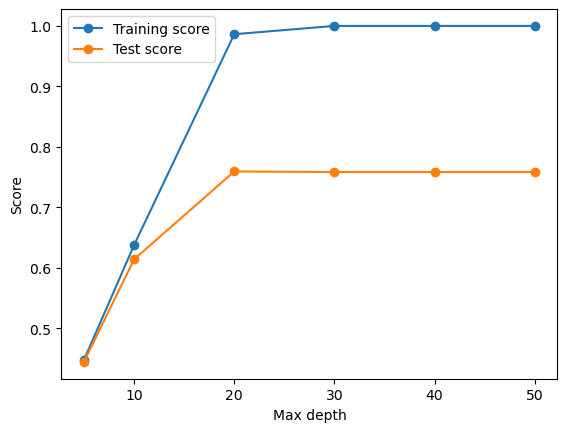

In [ ]:
#3

from sklearn.model_selection import validation_curve

param_range = [None, 5, 10, 20, 30, 40, 50]
train_scores, test_scores = validation_curve(dt_best_model, X_train, y_train, param_name="max_depth", param_range=param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean, 'o-', label='Training score')
plt.plot(param_range, test_scores_mean, 'o-', label='Test score')
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

# K-Nearest Neighbors  allora non vanno gli altri paramm, 15 è giusto
knn_param_grid = {
    'n_neighbors': [15],   #11
    'weights': ['uniform', 'distance'],
    #'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # Utilizzato con la distanza di Minkowski (1 = distanza di Manhattan, 2 = distanza euclidea)
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

print("\nMigliori parametri per KNN:", knn_grid_search.best_params_)
print("Migliore accuratezza sul set di addestramento:", knn_grid_search.best_score_)


Migliori parametri per KNN: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Migliore accuratezza sul set di addestramento: 0.49025014212620804


In [ ]:
# Fai predizioni con KNN
knn_best_model = knn_grid_search.best_estimator_

y_pred = knn_best_model.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, digits =3)

print(f'Accuracy: {accuracy}')
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print('Classification Report:\n', classification_report_result)

Accuracy: 0.49965889710062533
F1-score 0.4926398242647988
Classification Report:
               precision    recall  f1-score   support

       angry      0.586     0.526     0.555      1970
       bored      0.503     0.394     0.442      1429
        calm      0.469     0.604     0.528      3683
     excited      0.456     0.533     0.491      2662
       happy      0.495     0.511     0.503      2350
     nervous      0.425     0.331     0.373      1415
    peaceful      0.615     0.267     0.372        90
     pleased      0.475     0.357     0.408      1768
     relaxed      0.503     0.262     0.344       627
         sad      0.681     0.800     0.736      1185
      sleepy      0.486     0.258     0.337       411

    accuracy                          0.500     17590
   macro avg      0.518     0.440     0.463     17590
weighted avg      0.500     0.500     0.493     17590



In [ ]:
from sklearn.metrics import accuracy_score

# Calcola l'accuratezza sul training set
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calcola l'accuratezza sul test set
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.5168845935190449
Test Accuracy: 0.49965889710062533


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Prova diverse configurazioni di K
k_values = [1, 3, 5, 10, 12, 15]
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    train_accuracy = knn_model.score(X_train, y_train)
    test_accuracy = knn_model.score(X_test, y_test)
    print("K =", k, "Train Accuracy:", train_accuracy, "Test Accuracy:", test_accuracy)


K = 1 Train Accuracy: 1.0 Test Accuracy: 0.4167140420693576
K = 3 Train Accuracy: 0.6570920977828312 Test Accuracy: 0.40483229107447416
K = 5 Train Accuracy: 0.601591813530415 Test Accuracy: 0.4191586128482092
K = 10 Train Accuracy: 0.542708925525867 Test Accuracy: 0.4250142126208073
K = 12 Train Accuracy: 0.5306566230812962 Test Accuracy: 0.4280841387151791
K = 15 Train Accuracy: 0.5168845935190449 Test Accuracy: 0.42910744741330303


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    knn_best_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


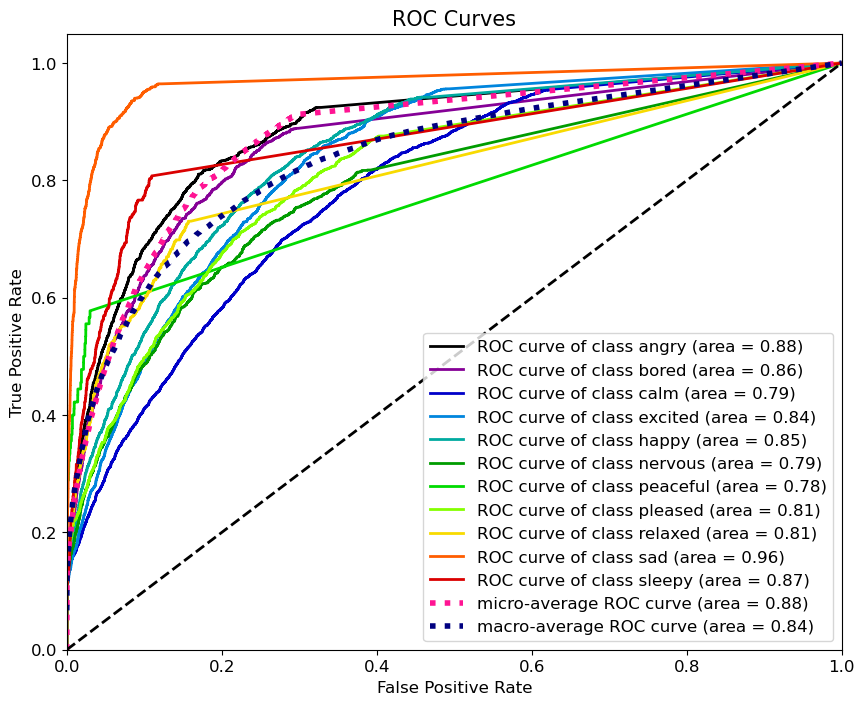

In [ ]:
y_score = knn_best_model.predict_proba(X_test)
plot_roc(y_test, y_score, figsize=(10,8), title_fontsize=15, text_fontsize=12)
plt.show()

In [ ]:
print(knn_best_model)
print(dt_best_model)

KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')
DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=15,
                       random_state=42)


In [ ]:
# Trova i valori unici e i conteggi corrispondenti
unique_values, counts = np.unique(y_train, return_counts=True)

# Stampa i valori unici e i rispettivi conteggi
for value, count in zip(unique_values, counts):
    print(value, "-->", count)

angry --> 7877
bored --> 5716
calm --> 14731
excited --> 10647
happy --> 9401
nervous --> 5662
peaceful --> 360
pleased --> 7074
relaxed --> 2509
sad --> 4739
sleepy --> 1644


# qui ci sono due prove di algo di Combinazione

In [ ]:
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Utilizza SMOTEENN per bilanciare le classi
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_resampled))


# Addestra un classificatore RandomForest sui dati bilanciati
clf = knn
clf.fit(X_resampled, y_resampled)

# Valuta le prestazioni del modello su dati di test
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       angry       0.43      0.61      0.50      1884
       bored       0.32      0.40      0.36      1462
        calm       0.67      0.04      0.07      3685
     excited       0.46      0.23      0.30      2684
       happy       0.44      0.36      0.40      2310
     nervous       0.24      0.50      0.33      1498
    peaceful       0.10      0.46      0.16        85
     pleased       0.29      0.35      0.32      1749
     relaxed       0.18      0.52      0.27       611
         sad       0.64      0.61      0.62      1186
      sleepy       0.21      0.51      0.30       436

    accuracy                           0.34     17590
   macro avg       0.36      0.42      0.33     17590
weighted avg       0.45      0.34      0.32     17590



In [ ]:
#1 
train_accuracy = knn.score(X_resampled, y_resampled)
test_accuracy = knn.score(X_test, y_test)

print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.8904964539007092
Accuratezza sul set di test: 0.34144400227401933


In [ ]:
# Utilizza SMOTETomek per bilanciare le classi

# Define SMOTE-Tomek Links
#resample= SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))


smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_resampled))

# Addestra un classificatore RandomForest sui dati bilanciati
clf = knn
clf.fit(X_resampled, y_resampled)

# Valuta le prestazioni del modello su dati di test
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Resampled dataset shape Counter({'peaceful': 14729, 'sleepy': 14728, 'relaxed': 14723, 'sad': 14713, 'bored': 14655, 'nervous': 14636, 'pleased': 14541, 'angry': 14535, 'happy': 14349, 'excited': 14261, 'calm': 14123})
Classification Report:
              precision    recall  f1-score   support

       angry       0.45      0.60      0.51      1884
       bored       0.35      0.44      0.39      1462
        calm       0.52      0.13      0.21      3685
     excited       0.43      0.33      0.38      2684
       happy       0.42      0.40      0.41      2310
     nervous       0.28      0.42      0.34      1498
    peaceful       0.11      0.46      0.18        85
     pleased       0.31      0.35      0.33      1749
     relaxed       0.21      0.46      0.29       611
         sad       0.64      0.61      0.62      1186
      sleepy       0.22      0.48      0.30       436

    accuracy                           0.37     17590
   macro avg       0.36      0.43      0.36     17590


# Undersampling

diminuisco la classe maggioritaria, cioè la classe 0

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

### RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'angry': 360, 'bored': 360, 'calm': 360, 'excited': 360, 'happy': 360, 'nervous': 360, 'peaceful': 360, 'pleased': 360, 'relaxed': 360, 'sad': 360, 'sleepy': 360})


In [ ]:
clf = dt_best_model
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Accuracy 0.3168845935190449
F1-score 0.32061181859373117
              precision    recall  f1-score   support

       angry       0.39      0.49      0.44      1970
       bored       0.35      0.35      0.35      1429
        calm       0.35      0.20      0.25      3683
     excited       0.37      0.27      0.31      2662
       happy       0.36      0.33      0.35      2350
     nervous       0.23      0.30      0.26      1415
    peaceful       0.08      0.63      0.15        90
     pleased       0.23      0.28      0.25      1768
     relaxed       0.16      0.30      0.21       627
         sad       0.62      0.49      0.55      1185
      sleepy       0.18      0.32      0.23       411

    accuracy                           0.32     17590
   macro avg       0.30      0.36      0.30     17590
weighted avg       0.34      0.32      0.32     17590



In [ ]:
clf = knn_best_model
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))


Accuracy 0.3283683911313246
F1-score 0.32650877100513936
              precision    recall  f1-score   support

       angry       0.46      0.45      0.46      1970
       bored       0.33      0.29      0.31      1429
        calm       0.36      0.15      0.21      3683
     excited       0.36      0.33      0.35      2662
       happy       0.34      0.39      0.36      2350
     nervous       0.24      0.37      0.29      1415
    peaceful       0.07      0.56      0.13        90
     pleased       0.26      0.25      0.25      1768
     relaxed       0.20      0.32      0.24       627
         sad       0.61      0.62      0.61      1185
      sleepy       0.19      0.40      0.25       411

    accuracy                           0.33     17590
   macro avg       0.31      0.38      0.32     17590
weighted avg       0.35      0.33      0.33     17590



### CondensedNearestNeighbour

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs= -1)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

### Tomek Links


In [ ]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'calm': 11798, 'excited': 8398, 'happy': 7517, 'angry': 6401, 'pleased': 5464, 'bored': 4532, 'nervous': 4340, 'sad': 4108, 'relaxed': 1920, 'sleepy': 1261, 'peaceful': 360})


In [ ]:
clf = dt_best_model
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))


Accuracy 0.43314383172256965
F1-score 0.42049268479913676
              precision    recall  f1-score   support

       angry       0.53      0.48      0.50      1970
       bored       0.42      0.38      0.40      1429
        calm       0.38      0.59      0.47      3683
     excited       0.42      0.45      0.43      2662
       happy       0.44      0.41      0.43      2350
     nervous       0.33      0.28      0.31      1415
    peaceful       0.52      0.24      0.33        90
     pleased       0.38      0.18      0.25      1768
     relaxed       0.44      0.12      0.18       627
         sad       0.66      0.75      0.70      1185
      sleepy       0.38      0.20      0.27       411

    accuracy                           0.43     17590
   macro avg       0.45      0.37      0.39     17590
weighted avg       0.43      0.43      0.42     17590



In [ ]:
clf = knn_best_model
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))


Accuracy 0.4628766344513928
F1-score 0.45523335367098894
              precision    recall  f1-score   support

       angry       0.52      0.51      0.52      1970
       bored       0.46      0.35      0.40      1429
        calm       0.43      0.55      0.49      3683
     excited       0.43      0.48      0.45      2662
       happy       0.45      0.48      0.47      2350
     nervous       0.41      0.31      0.35      1415
    peaceful       0.42      0.28      0.34        90
     pleased       0.44      0.33      0.37      1768
     relaxed       0.45      0.22      0.30       627
         sad       0.65      0.79      0.71      1185
      sleepy       0.40      0.22      0.29       411

    accuracy                           0.46     17590
   macro avg       0.46      0.41      0.43     17590
weighted avg       0.46      0.46      0.46     17590



### Edited Nearest Neighbors


In [ ]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'calm': 1839, 'sad': 1678, 'angry': 1189, 'excited': 1140, 'happy': 1114, 'pleased': 639, 'bored': 466, 'nervous': 413, 'peaceful': 360, 'relaxed': 246, 'sleepy': 117})


In [ ]:
clf = dt_best_model
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))


Accuracy 0.3964184195565662
F1-score 0.38095397371726486
              precision    recall  f1-score   support

       angry       0.48      0.48      0.48      1970
       bored       0.39      0.31      0.35      1429
        calm       0.35      0.59      0.44      3683
     excited       0.41      0.39      0.40      2662
       happy       0.44      0.38      0.41      2350
     nervous       0.36      0.18      0.24      1415
    peaceful       0.10      0.62      0.17        90
     pleased       0.32      0.15      0.21      1768
     relaxed       0.21      0.09      0.12       627
         sad       0.64      0.70      0.67      1185
      sleepy       0.36      0.04      0.07       411

    accuracy                           0.40     17590
   macro avg       0.37      0.36      0.32     17590
weighted avg       0.40      0.40      0.38     17590



In [ ]:
clf = knn_best_model
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))


Accuracy 0.37731665719158614
F1-score 0.3620163866067462
              precision    recall  f1-score   support

       angry       0.44      0.48      0.46      1970
       bored       0.36      0.23      0.28      1429
        calm       0.38      0.45      0.41      3683
     excited       0.35      0.42      0.38      2662
       happy       0.38      0.38      0.38      2350
     nervous       0.26      0.17      0.21      1415
    peaceful       0.11      0.56      0.19        90
     pleased       0.32      0.17      0.22      1768
     relaxed       0.29      0.13      0.18       627
         sad       0.54      0.81      0.65      1185
      sleepy       0.20      0.06      0.10       411

    accuracy                           0.38     17590
   macro avg       0.33      0.35      0.31     17590
weighted avg       0.37      0.38      0.36     17590



In [ ]:
# Trova i valori unici e i conteggi corrispondenti
unique_values, counts = np.unique(y_train, return_counts=True)

# Stampa i valori unici e i rispettivi conteggi
for value, count in zip(unique_values, counts):
    print(value, "-->", count)

angry --> 7877
bored --> 5716
calm --> 14731
excited --> 10647
happy --> 9401
nervous --> 5662
peaceful --> 360
pleased --> 7074
relaxed --> 2509
sad --> 4739
sleepy --> 1644


# Oversampling


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

### RandomOverSampler


In [ ]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'happy': 14731, 'nervous': 14731, 'calm': 14731, 'excited': 14731, 'sad': 14731, 'bored': 14731, 'angry': 14731, 'sleepy': 14731, 'pleased': 14731, 'relaxed': 14731, 'peaceful': 14731})


In [ ]:
clf = dt_best_model
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))


Accuracy 0.37237066515065376
F1-score 0.3579502510873419
              precision    recall  f1-score   support

       angry       0.51      0.60      0.55      1970
       bored       0.36      0.47      0.41      1429
        calm       0.44      0.09      0.15      3683
     excited       0.40      0.31      0.35      2662
       happy       0.45      0.37      0.40      2350
     nervous       0.27      0.43      0.33      1415
    peaceful       0.15      0.46      0.22        90
     pleased       0.28      0.49      0.36      1768
     relaxed       0.22      0.38      0.28       627
         sad       0.73      0.59      0.65      1185
      sleepy       0.22      0.55      0.32       411

    accuracy                           0.37     17590
   macro avg       0.37      0.43      0.37     17590
weighted avg       0.41      0.37      0.36     17590



In [ ]:
clf = knn_best_model
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))


Accuracy 0.41500852757248435
F1-score 0.41747078603134463
              precision    recall  f1-score   support

       angry       0.48      0.53      0.50      1970
       bored       0.40      0.43      0.41      1429
        calm       0.59      0.26      0.36      3683
     excited       0.46      0.39      0.42      2662
       happy       0.46      0.47      0.47      2350
     nervous       0.29      0.42      0.35      1415
    peaceful       0.18      0.38      0.25        90
     pleased       0.36      0.39      0.38      1768
     relaxed       0.21      0.44      0.28       627
         sad       0.61      0.64      0.62      1185
      sleepy       0.20      0.45      0.27       411

    accuracy                           0.42     17590
   macro avg       0.39      0.44      0.39     17590
weighted avg       0.46      0.42      0.42     17590



### SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'happy': 14731, 'nervous': 14731, 'calm': 14731, 'excited': 14731, 'sad': 14731, 'bored': 14731, 'angry': 14731, 'sleepy': 14731, 'pleased': 14731, 'relaxed': 14731, 'peaceful': 14731})


In [ ]:
clf = dt_best_model
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))


Accuracy 0.3827174530983513
F1-score 0.37319559131342134
              precision    recall  f1-score   support

       angry       0.52      0.57      0.54      1970
       bored       0.39      0.46      0.42      1429
        calm       0.47      0.11      0.18      3683
     excited       0.42      0.34      0.38      2662
       happy       0.42      0.43      0.42      2350
     nervous       0.30      0.40      0.34      1415
    peaceful       0.12      0.51      0.20        90
     pleased       0.29      0.42      0.34      1768
     relaxed       0.20      0.50      0.28       627
         sad       0.73      0.62      0.67      1185
      sleepy       0.24      0.51      0.33       411

    accuracy                           0.38     17590
   macro avg       0.37      0.44      0.37     17590
weighted avg       0.42      0.38      0.37     17590



In [ ]:
clf = knn_best_model
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))


Accuracy 0.42779988629903354
F1-score 0.4308229757029001
              precision    recall  f1-score   support

       angry       0.49      0.54      0.51      1970
       bored       0.42      0.45      0.43      1429
        calm       0.61      0.27      0.37      3683
     excited       0.48      0.41      0.44      2662
       happy       0.47      0.49      0.48      2350
     nervous       0.30      0.43      0.36      1415
    peaceful       0.12      0.44      0.19        90
     pleased       0.38      0.41      0.39      1768
     relaxed       0.21      0.40      0.28       627
         sad       0.64      0.65      0.64      1185
      sleepy       0.21      0.44      0.28       411

    accuracy                           0.43     17590
   macro avg       0.39      0.45      0.40     17590
weighted avg       0.47      0.43      0.43     17590



### ADASYN

In [ ]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'happy': 16177, 'calm': 14731, 'sleepy': 14651, 'peaceful': 14623, 'nervous': 14579, 'relaxed': 14540, 'sad': 14339, 'angry': 14186, 'bored': 14161, 'pleased': 13551, 'excited': 12525})


In [ ]:
clf = dt_best_model
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))


Accuracy 0.37185901080159184
F1-score 0.3556882006102307
              precision    recall  f1-score   support

       angry       0.51      0.61      0.55      1970
       bored       0.38      0.46      0.41      1429
        calm       0.43      0.10      0.17      3683
     excited       0.45      0.22      0.29      2662
       happy       0.39      0.51      0.44      2350
     nervous       0.28      0.46      0.35      1415
    peaceful       0.12      0.59      0.20        90
     pleased       0.29      0.39      0.33      1768
     relaxed       0.20      0.45      0.28       627
         sad       0.69      0.58      0.63      1185
      sleepy       0.22      0.44      0.29       411

    accuracy                           0.37     17590
   macro avg       0.36      0.44      0.36     17590
weighted avg       0.41      0.37      0.36     17590



In [ ]:
clf = knn_best_model
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))


Accuracy 0.4176805002842524
F1-score 0.41776415488901014
              precision    recall  f1-score   support

       angry       0.48      0.58      0.53      1970
       bored       0.41      0.44      0.42      1429
        calm       0.61      0.26      0.36      3683
     excited       0.51      0.33      0.40      2662
       happy       0.42      0.52      0.47      2350
     nervous       0.30      0.45      0.36      1415
    peaceful       0.12      0.43      0.19        90
     pleased       0.38      0.38      0.38      1768
     relaxed       0.21      0.41      0.28       627
         sad       0.59      0.65      0.62      1185
      sleepy       0.20      0.42      0.27       411

    accuracy                           0.42     17590
   macro avg       0.39      0.44      0.39     17590
weighted avg       0.46      0.42      0.42     17590



# ULTIMA PROVA CON ADASYN E SMOT RIESEGUENDO GRID

### SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'happy': 14731, 'nervous': 14731, 'calm': 14731, 'excited': 14731, 'sad': 14731, 'bored': 14731, 'angry': 14731, 'sleepy': 14731, 'pleased': 14731, 'relaxed': 14731, 'peaceful': 14731})


In [ ]:
#con grid
from sklearn.model_selection import GridSearchCV

# Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, n_jobs=-1)
dt_grid_search.fit(X_res, y_res)

print("Migliori parametri per Decision Tree:", dt_grid_search.best_params_)
print("Migliore accuratezza sul set di addestramento:", dt_grid_search.best_score_)


Migliori parametri per Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Migliore accuratezza sul set di addestramento: 0.6524769794061506


In [ ]:
dt_best_model = dt_grid_search.best_estimator_
y_pred = dt_best_model.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Accuracy 0.4198976691301876
F1-score 0.42255832081383843
              precision    recall  f1-score   support

       angry       0.50      0.51      0.50      1970
       bored       0.41      0.42      0.42      1429
        calm       0.47      0.35      0.40      3683
     excited       0.42      0.40      0.41      2662
       happy       0.43      0.43      0.43      2350
     nervous       0.32      0.39      0.35      1415
    peaceful       0.21      0.39      0.27        90
     pleased       0.34      0.38      0.36      1768
     relaxed       0.24      0.35      0.29       627
         sad       0.69      0.65      0.67      1185
      sleepy       0.29      0.45      0.35       411

    accuracy                           0.42     17590
   macro avg       0.39      0.43      0.40     17590
weighted avg       0.43      0.42      0.42     17590



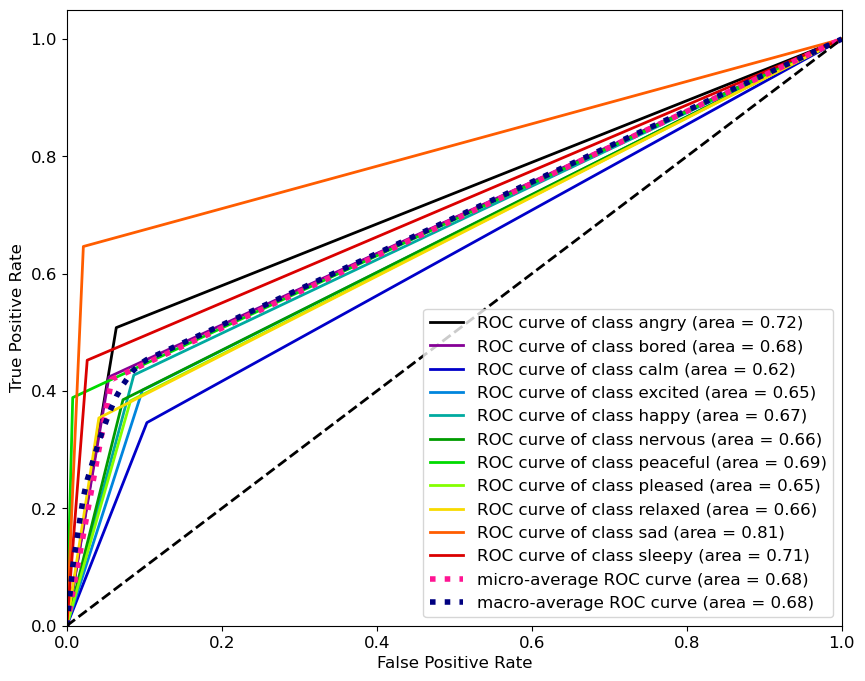

In [ ]:
from scikitplot.metrics import plot_roc

y_score = dt_best_model.predict_proba(X_test)
plot_roc(y_test, y_score, figsize=(10,8), title_fontsize=15, text_fontsize=12)
plt.title("")
plt.show()

verifico eventuale overifitting:
1. Confronto tra prestazioni di addestramento e test: Calcola l'accuratezza del modello sia sul set di addestramento che sul set di test e confrontali. Se l'accuratezza sul set di addestramento è molto più alta rispetto a quella sul set di test, potrebbe essere un segno di overfitting.

2. Curve di Apprendimento: Disegna le curve di apprendimento per valutare le prestazioni del modello al variare della dimensione del set di addestramento e confronta le prestazioni sul set di addestramento e di test.

3. Curva di Complessità del Modello: Disegna la curva di complessità del modello per valutare le prestazioni del modello al variare della complessità, ad esempio la profondità massima dell'albero decisionale, e confronta le prestazioni sul set di addestramento e di test.

In [ ]:
#1 

train_accuracy = dt_best_model.score(X_train, y_train)
test_accuracy = dt_best_model.score(X_test, y_test)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 1.0
Accuratezza sul set di test: 0.4198976691301876


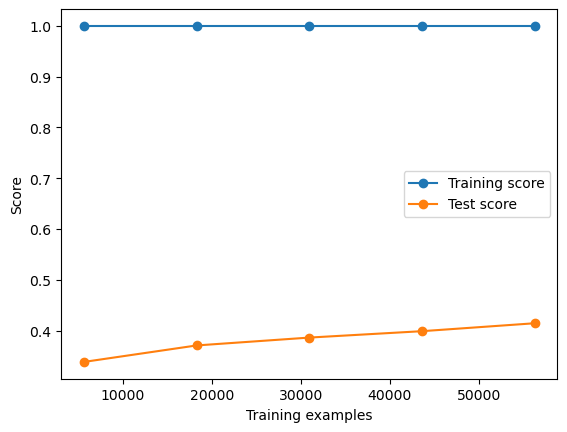

In [ ]:
#2

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(dt_best_model, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Test score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

In [ ]:
#3

from sklearn.model_selection import validation_curve

param_range = [None, 5, 10, 20, 30, 40, 50]
train_scores, test_scores = validation_curve(dt_best_model, X_train, y_train, param_name="max_depth", param_range=param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean, 'o-', label='Training score')
plt.plot(param_range, test_scores_mean, 'o-', label='Test score')
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


KeyboardInterrupt: 

KNN

In [ ]:
# K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    #'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # Utilizzato con la distanza di Minkowski (1 = distanza di Manhattan, 2 = distanza euclidea)
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, n_jobs=-1)
knn_grid_search.fit(X_res, y_res)

print("\nMigliori parametri per KNN:", knn_grid_search.best_params_)
print("Migliore accuratezza sul set di addestramento:", knn_grid_search.best_score_)

In [ ]:
# Fai predizioni con KNN
knn_best_model = knn_grid_search.best_estimator_
y_pred = knn_best_model.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, digits =3)

print(f'Accuracy: {accuracy}')
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print('Classification Report:\n', classification_report_result)

In [ ]:
y_score = knn_best_model.predict_proba(X_test)
plot_roc(y_test, y_score, figsize=(10,8), title_fontsize=15, text_fontsize=12)
plt.show()

### ADASYN

In [ ]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'happy': 16177, 'calm': 14731, 'sleepy': 14651, 'peaceful': 14623, 'nervous': 14579, 'relaxed': 14540, 'sad': 14339, 'angry': 14186, 'bored': 14161, 'pleased': 13551, 'excited': 12525})


In [ ]:
#con grid
from sklearn.model_selection import GridSearchCV

# Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, n_jobs=-1)
dt_grid_search.fit(X_res, y_res)

print("Migliori parametri per Decision Tree:", dt_grid_search.best_params_)
print("Migliore accuratezza sul set di addestramento:", dt_grid_search.best_score_)


In [ ]:
dt_best_model = dt_grid_search.best_estimator_
y_pred = dt_best_model.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

In [ ]:
from scikitplot.metrics import plot_roc

y_score = dt_best_model.predict_proba(X_test)
plot_roc(y_test, y_score, figsize=(10,8), title_fontsize=15, text_fontsize=12)
plt.title("")
plt.show()

verifico eventuale overifitting:
1. Confronto tra prestazioni di addestramento e test: Calcola l'accuratezza del modello sia sul set di addestramento che sul set di test e confrontali. Se l'accuratezza sul set di addestramento è molto più alta rispetto a quella sul set di test, potrebbe essere un segno di overfitting.

2. Curve di Apprendimento: Disegna le curve di apprendimento per valutare le prestazioni del modello al variare della dimensione del set di addestramento e confronta le prestazioni sul set di addestramento e di test.

3. Curva di Complessità del Modello: Disegna la curva di complessità del modello per valutare le prestazioni del modello al variare della complessità, ad esempio la profondità massima dell'albero decisionale, e confronta le prestazioni sul set di addestramento e di test.

In [ ]:
#1 

train_accuracy = dt_best_model.score(X_train, y_train)
test_accuracy = dt_best_model.score(X_test, y_test)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.49043490619670266
Accuratezza sul set di test: 0.4315520181921546


In [ ]:
#2

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(dt_best_model, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Test score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

In [ ]:
#3

from sklearn.model_selection import validation_curve

param_range = [None, 5, 10, 20, 30, 40, 50]
train_scores, test_scores = validation_curve(dt_best_model, X_train, y_train, param_name="max_depth", param_range=param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean, 'o-', label='Training score')
plt.plot(param_range, test_scores_mean, 'o-', label='Test score')
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


KNN

In [ ]:
# K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    #'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # Utilizzato con la distanza di Minkowski (1 = distanza di Manhattan, 2 = distanza euclidea)
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, n_jobs=-1)
knn_grid_search.fit(X_res, y_res)

print("\nMigliori parametri per KNN:", knn_grid_search.best_params_)
print("Migliore accuratezza sul set di addestramento:", knn_grid_search.best_score_)

In [ ]:
# Fai predizioni con KNN
knn_best_model = knn_grid_search.best_estimator_
y_pred = knn_best_model.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, digits =3)

print(f'Accuracy: {accuracy}')
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print('Classification Report:\n', classification_report_result)

In [ ]:
y_score = knn_best_model.predict_proba(X_test)
plot_roc(y_test, y_score, figsize=(10,8), title_fontsize=15, text_fontsize=12)
plt.show()